# CoronaVirus Plots

In [40]:
import pandas as pd #Dataframe manipulation library
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import matplotlib as mpl
import folium
import os
import random
import math #Math functions
import time
import requests
from matplotlib import style
import datetime
plt.style.use('bmh')
%matplotlib inline

In [41]:
###Import the data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [42]:
cols = confirmed_df.keys()

In [43]:
###Get all the dates for the outbreak
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [44]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
active_cases = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    total_recovered.append(recovered_sum)
    active_cases.append(confirmed_sum-(recovered_sum+death_sum))
    active_cases_sum=(confirmed_sum-(recovered_sum+death_sum)).sum()

In [45]:
file_date
print("Number of Coronavirus confirmed cases : "+ str(confirmed_sum))
print("Number of Coronavirus active cases : "+ str(active_cases_sum))
print("Number of Coronavirus recovered cases : "+ str(recovered_sum))
print("Number of Coronavirus deaths cases : "+ str(death_sum))

Number of Coronavirus confirmed cases : 529591
Number of Coronavirus active cases : 383471
Number of Coronavirus recovered cases : 122150
Number of Coronavirus deaths cases : 23970


In [46]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
active_cases = np.array(active_cases).reshape(-1, 1)

In [47]:
###Future forecast
days_in_future = 30
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)

In [48]:
###Convert integer into datetime for better visualization
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
adjusted_dates = future_forcast_dates[:-30]

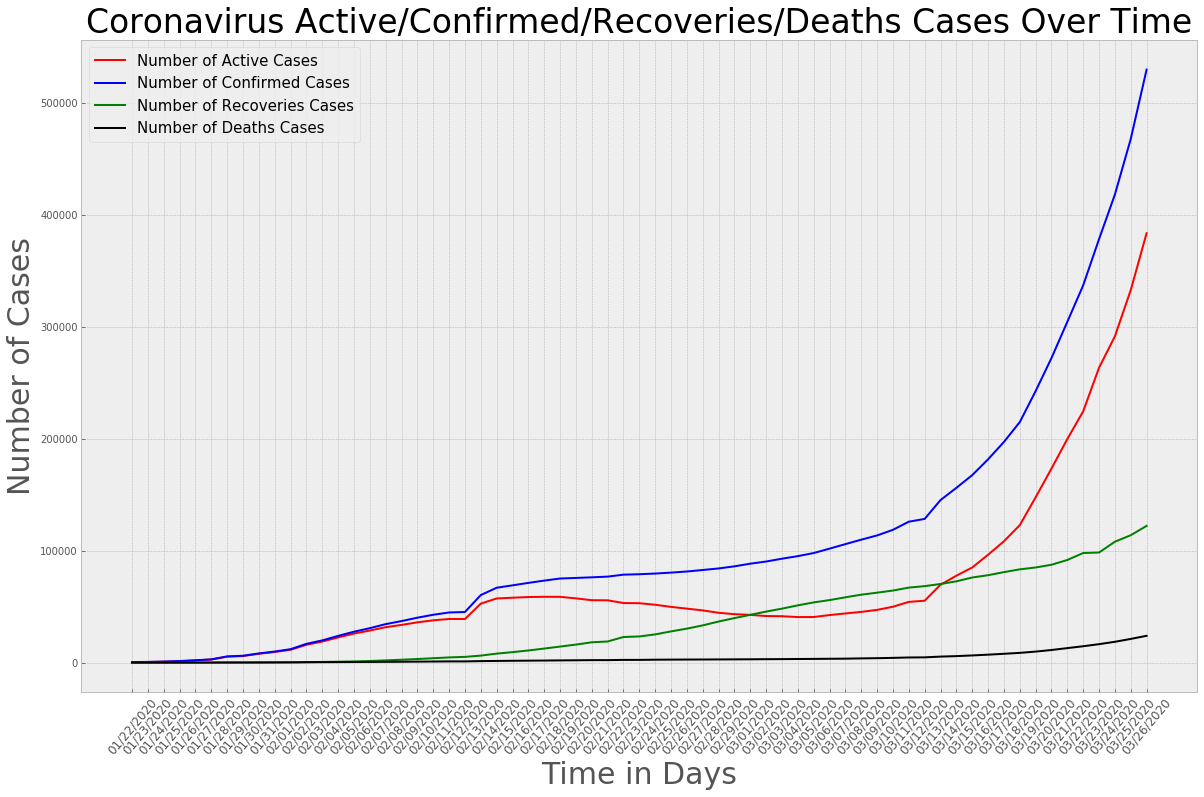

In [49]:
#Coronavirus Active/Confirmed/Recoveries/Deaths Cases Over Time
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, active_cases, color='red')
plt.plot(adjusted_dates, world_cases, color='blue')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.plot(adjusted_dates, total_deaths, color='black')
plt.title('Coronavirus Active/Confirmed/Recoveries/Deaths Cases Over Time', size=33)
plt.legend(['Number of Active Cases','Number of Confirmed Cases', 'Number of Recoveries Cases', 'Number of Deaths Cases'], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(rotation=50, size=12)
mpl.style.use('ggplot') # optional: for ggplot-like style
plt.show()

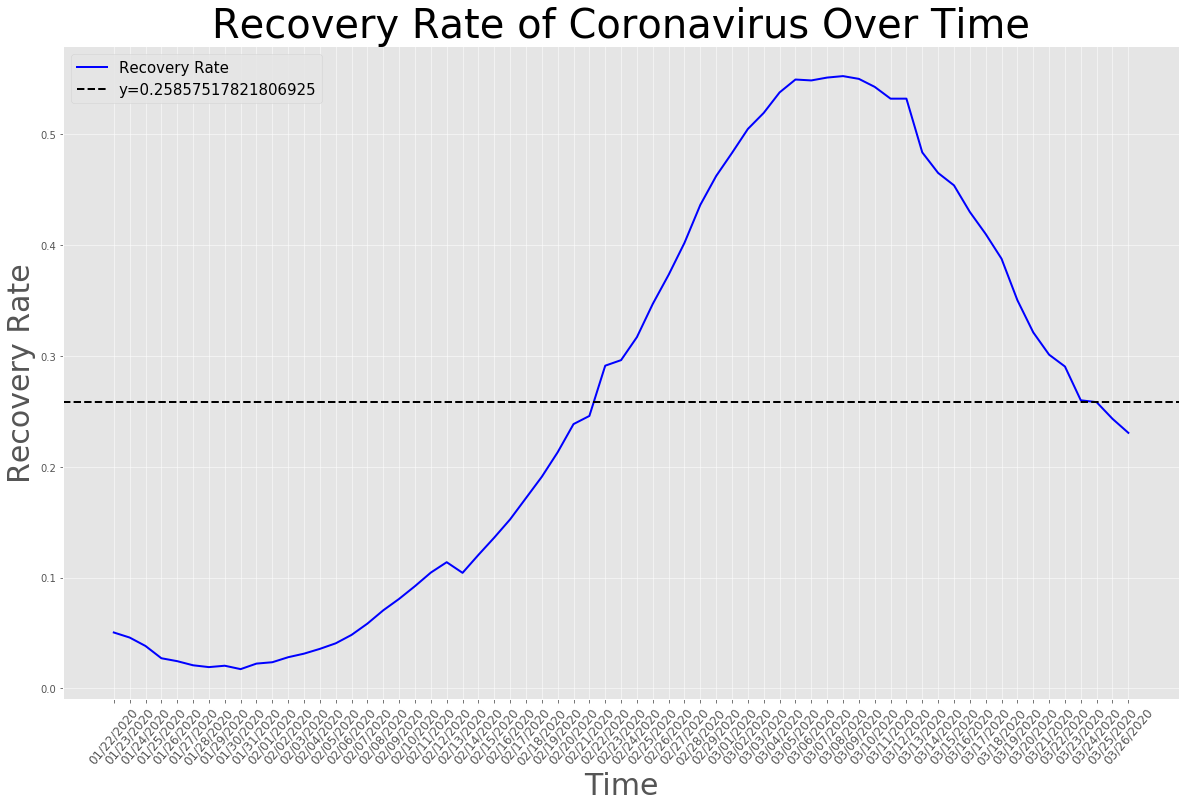

In [51]:
###Recovery Rate of Coronavirus Over Time
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time', size=40)
plt.legend(['Recovery Rate', 'y='+str(mean_recovery_rate)], loc='upper left', fontsize=15)
plt.xlabel('Time', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(rotation=50, size=12)
plt.show()

In [52]:
print ("The Recovery Rate Percentage of Coronavirus is "+ str(mean_recovery_rate*100) )

The Recovery Rate Percentage of Coronavirus is 25.857517821806926


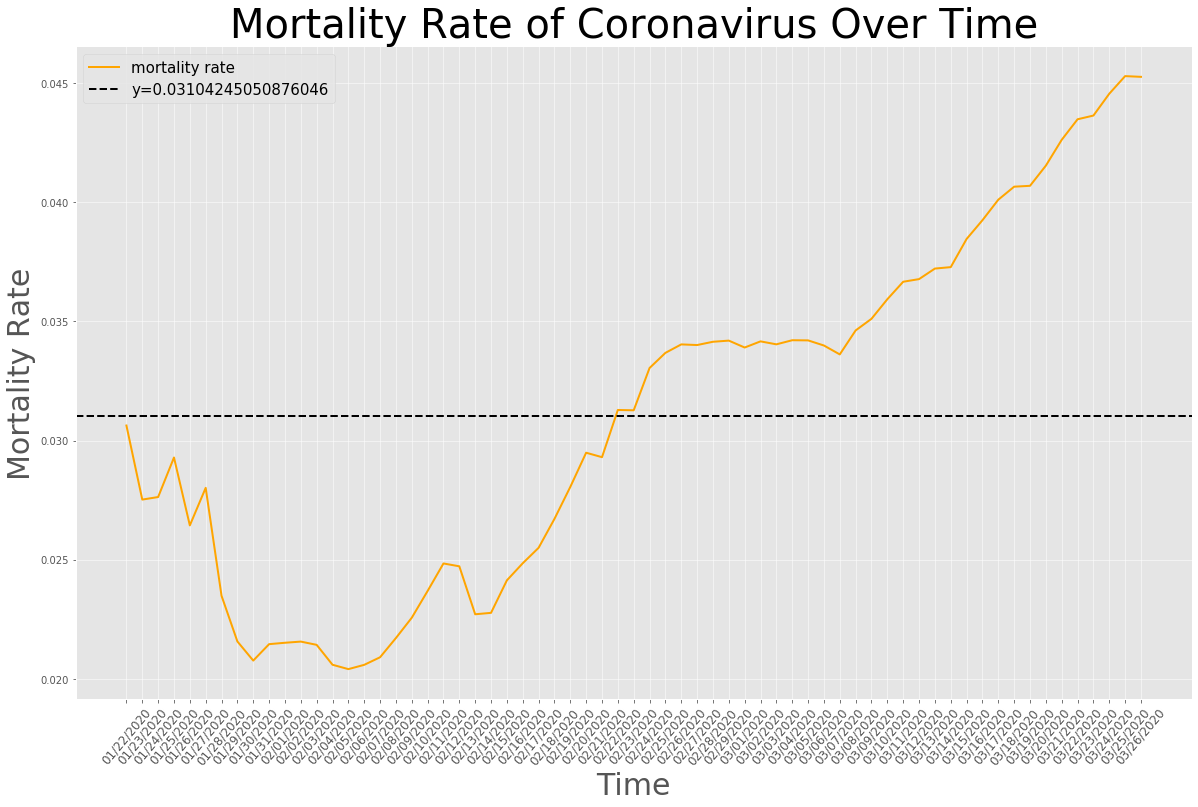

In [53]:
###Mortality Rate of Coronavirus Over Time
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=40)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)], loc='upper left', fontsize=15)
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(rotation=50, size=12)
plt.show()

In [54]:
print("The Mortality Rate Percentage of Coronavirus is "+ str(mean_mortality_rate*100))

The Mortality Rate Percentage of Coronavirus is 3.104245050876046


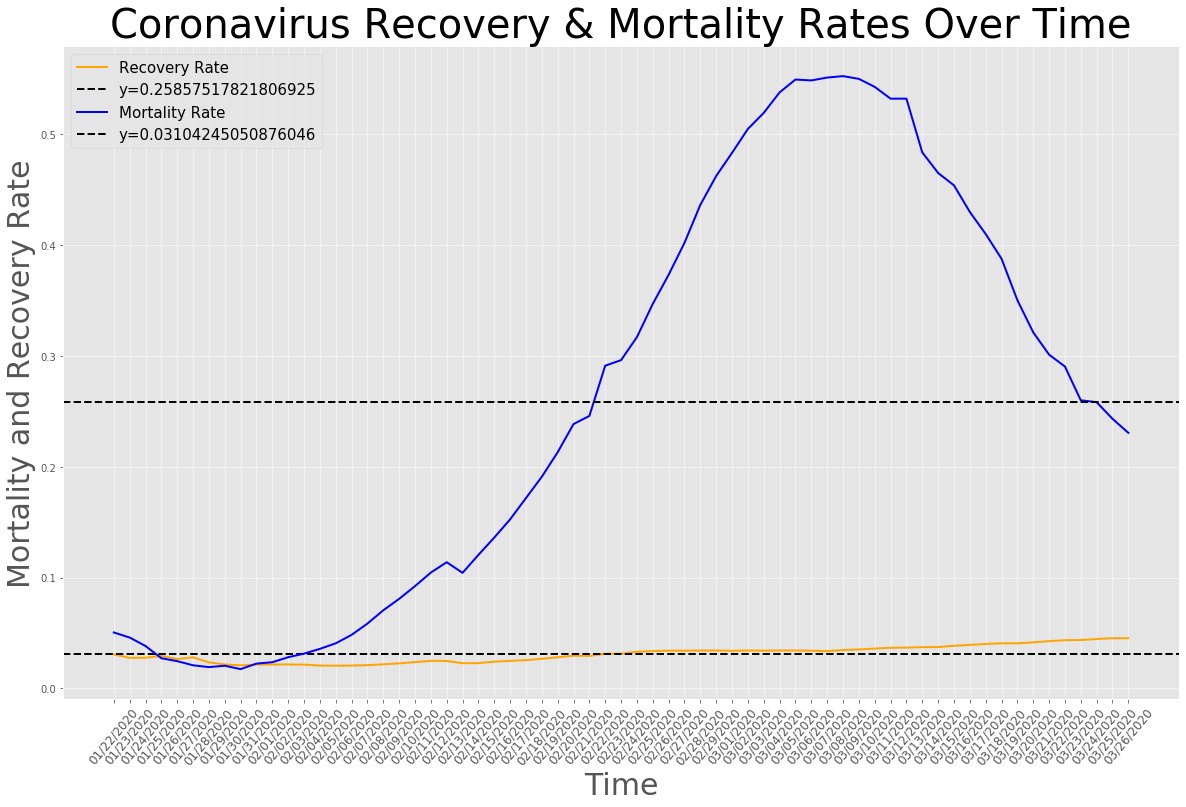

In [55]:
###Coronavirus Recovery & Mortality Rate Over Time
mean_recovery_rate = np.mean(recovery_rate)
mean_mortality_rate = np.mean(mortality_rate)


plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Coronavirus Recovery & Mortality Rates Over Time', size=40)
plt.legend(['Recovery Rate', 'y='+str(mean_recovery_rate),'Mortality Rate', 'y='+str(mean_mortality_rate)], loc='upper left', fontsize=15)

plt.xlabel('Time', size=30)
plt.ylabel('Mortality and Recovery Rate', size=30)
plt.xticks(rotation=50, size=12)
plt.show()

# Predictions using Support-Vector Machine (SVM) and Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [57]:
###Future forecast
days_in_future = 30
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)

In [58]:
###Convert integer into datetime for better visualization
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
adjusted_dates = future_forcast_dates[:-30]

In [59]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.1, shuffle=False) 

In [60]:
kernel = ['linear', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed.ravel())
svm_search.best_params_
svm_confirmed = svm_search.best_estimator_
svm_predC = svm_confirmed.predict(future_forcast)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [61]:
linear_model = LinearRegression(fit_intercept=False, normalize=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_predC = linear_model.predict(X_test_confirmed)
linear_predC = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_predC, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_predC, y_test_confirmed))

MAE: 219384.94512969078
MSE: 54438054476.83824


In [62]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, total_recovered, test_size=0.1, shuffle=False) 

In [63]:
kernel = ['linear', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed.ravel())
svm_search.best_params_
svm_confirmed = svm_search.best_estimator_
svm_predR = svm_confirmed.predict(future_forcast)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [64]:
linear_model = LinearRegression(fit_intercept=False, normalize=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_predR = linear_model.predict(X_test_confirmed)
linear_predR = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_predR, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_predR, y_test_confirmed))

MAE: 33417.0923222599
MSE: 1202672331.355017


In [65]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, total_deaths, test_size=0.1, shuffle=False) 

In [66]:
kernel = ['linear', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed.ravel())
svm_search.best_params_
svm_confirmed = svm_search.best_estimator_
svm_predD = svm_confirmed.predict(future_forcast)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [67]:
linear_model = LinearRegression(fit_intercept=False, normalize=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_predD = linear_model.predict(X_test_confirmed)
linear_predD = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_predD, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_predD, y_test_confirmed))

MAE: 11132.939558792032
MSE: 139963563.33367684


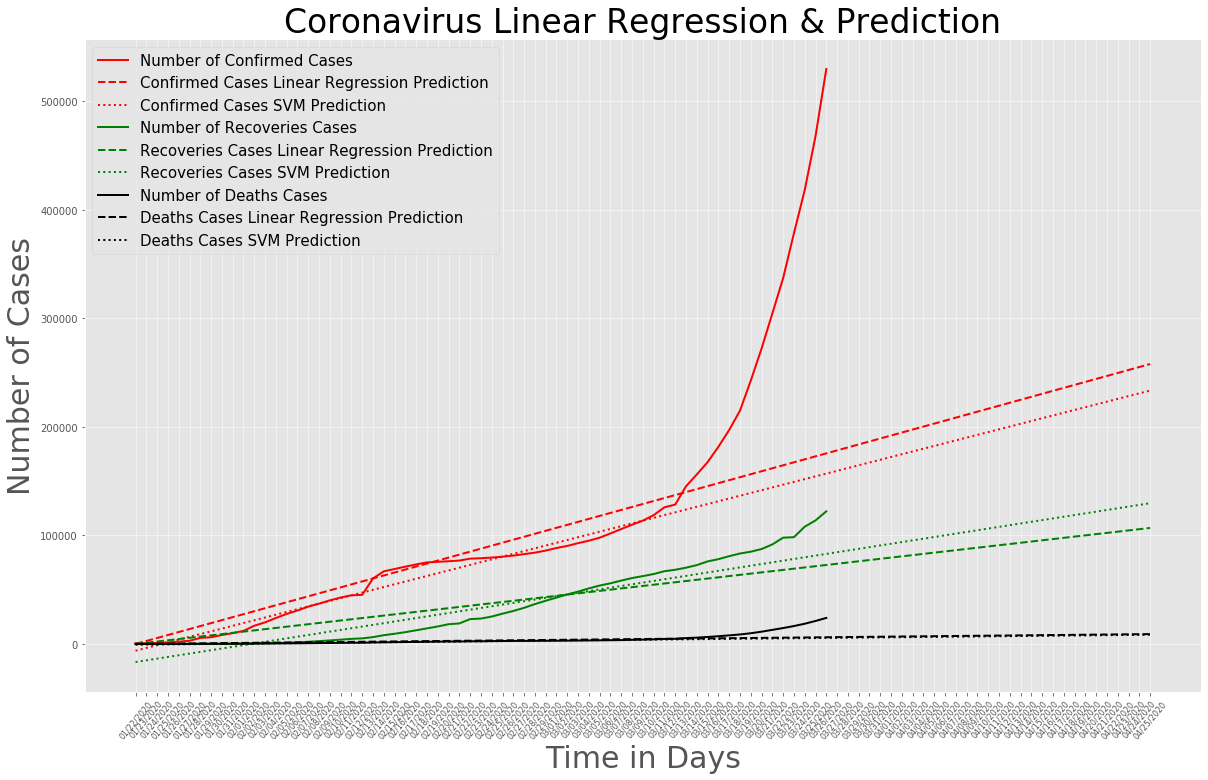

In [69]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases, color='red')
plt.plot(future_forcast_dates, linear_predC, linestyle='dashed', color='red')
plt.plot(future_forcast_dates, svm_predC, linestyle='dotted', color='red')

plt.plot(adjusted_dates, total_recovered, color='green')
plt.plot(future_forcast_dates, linear_predR, linestyle='dashed', color='green')
plt.plot(future_forcast_dates, svm_predR, linestyle='dotted', color='green')

plt.plot(adjusted_dates, total_deaths, color='black')
plt.plot(future_forcast_dates, linear_predD, linestyle='dashed', color='black')
plt.plot(future_forcast_dates, svm_predD, linestyle='dotted', color='black')


plt.title('Coronavirus Linear Regression & Prediction', size=33)
plt.legend(['Number of Confirmed Cases', 'Confirmed Cases Linear Regression Prediction', 'Confirmed Cases SVM Prediction', 'Number of Recoveries Cases', 'Recoveries Cases Linear Regression Prediction', 'Recoveries Cases SVM Prediction', 'Number of Deaths Cases', 'Deaths Cases Linear Regression Prediction', 'Deaths Cases SVM Prediction'], loc='upper left', fontsize=15)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(rotation=50, size=8)
plt.show()